# Code to read images from FVC2006 DB2_A

In [1]:
import cv2
import os
# Get the path to the images
images_path = '/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/datasets/FVC2006DB2A'
# fvc2006db2a

In [2]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

2023-07-30 09:54:53.620010: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import argparse
import numpy as np
from keras.models import load_model

# Parse command-line arguments
parser = argparse.ArgumentParser(description="Train, test, or deploy the model")
parser.add_argument("mode", choices=["train", "test", "deploy"], help="Mode selection")
args = parser.parse_args("deploy".split())


In [4]:
import cv2
import numpy as np
def random_distortion(image):
    rows, cols = image.shape[:2]
    # Define the distortion parameters
    random_scale = np.random.uniform(0.8, 1.2)
    random_angle = np.random.uniform(-15, 15)
    random_translation = np.random.uniform(-10, 10, (2,))
    # Apply the distortion
    M = cv2.getRotationMatrix2D((cols/2, rows/2), random_angle, random_scale)
    M[:, 2] += random_translation
    distorted_image = cv2.warpAffine(image, M, (cols, rows))
    # print(distorted_image.shape)
    return distorted_image

def random_gaussian_blurring(image):
    # Generate random blurring parameters
    random_sigma = np.random.uniform(0, 2.0)
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(image, (0, 0), random_sigma)
    # print(blurred_image.shape)
    return blurred_image

def random_rotation(image):
    rows, cols = image.shape[:2]
    # Generate random rotation angle
    random_angle = np.random.uniform(-30, 30)
    # Apply rotation
    M = cv2.getRotationMatrix2D((cols/2, rows/2), random_angle, 1)
    rotated_image = cv2.warpAffine(image, M, (cols, rows))
    # print(rotated_image.shape)
    return rotated_image

def random_scaling(image):
    rows, cols = image.shape[:2]
    # Generate random scaling factor
    random_scale = np.random.uniform(0.8, 1.2)
    # Apply scaling
    scaled_image = cv2.resize(image, (int(cols*random_scale), int(rows*random_scale)))
    scaled_image = cv2.resize(scaled_image, (cols, rows))
    # print(scaled_image.shape)
    return scaled_image

def random_contrast(image):
    # Generate random contrast factor
    random_factor = np.random.uniform(0.5, 1.5)
    # Apply contrast adjustment
    adjusted_image = np.clip(image * random_factor, 0, 255).astype(np.uint8)
    # print(adjusted_image.shape)
    return adjusted_image

def random_noise(image):
    # Generate random noise parameters
    random_mean = 0
    random_std = np.random.uniform(0, 30)
    # Apply Gaussian noise
    noise = np.random.normal(random_mean, random_std, image.shape).astype(np.uint8)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    # print(noisy_image.shape)
    return noisy_image

def random_morphology(image):
    # Generate random kernel size for morphology operations
    kernel_size = np.random.randint(2, 7)
    # Generate random morphology operation
    morph_op = np.random.choice([cv2.MORPH_OPEN, cv2.MORPH_CLOSE])
    # Create the kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
    # Apply morphology operation
    morph_image = cv2.morphologyEx(image, morph_op, kernel)
    # print(morph_image.shape)
    return morph_image



In [38]:
# processed_images_path = '/home/rs/21CS91R01/research/2023_ICVGIP-Code/datasets/processed_images_path'
# if not os.path.exists(processed_images_path):
#     os.mkdir(processed_images_path)

# List to store preprocessed images
preprocessed_images_train = []
labels_train = []

preprocessed_images_test = []
labels_test = []

# Iterate over the images
for image_name in os.listdir(images_path):
    if image_name.endswith('.bmp'):
        # Extract the label from the image name without considering variations
        image_name_ex = image_name.split('.')[0]
        print(image_name_ex)
        image_no = image_name_ex.split('_')[0]
        print(image_no)
        index =image_name_ex.split('_')[1]
        print(index)


        # Read the image
        image_path = os.path.join(images_path, image_name)
        image = cv2.imread(image_path)
     
        # Resize the image
        resized_image = cv2.resize(image, (224, 224))

        # Convert the image to grayscale
        # gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Normalize the image
        normalized_image = resized_image
        # distorted_image = random_distortion(resized_image)
        # blurred_image = random_gaussian_blurring(resized_image)
        # rotated_image = random_rotation(resized_image)
        # scaled_image = random_scaling(resized_image)
        # noisy_image = random_noise(resized_image)
        # adjusted_image = random_contrast(resized_image)
        # morphed_image = random_morphology(resized_image)


        # Save the image
        # processed_image_path = os.path.join(processed_images_path, image_name)
        # cv2.imwrite(processed_image_path, normalized_image)

        # Add the preprocessed image and label to the lists
        if (int(index) >= 5 and int(index) <= 12):
            preprocessed_images_train.append(np.array(normalized_image))
            # preprocessed_images_train.append(np.array(distorted_image))
            # preprocessed_images_train.append(np.array(blurred_image))
            # preprocessed_images_train.append(np.array(rotated_image))
            # preprocessed_images_train.append(np.array(scaled_image))
            # preprocessed_images_train.append(np.array(adjusted_image))
            # preprocessed_images_train.append(np.array(noisy_image))
            # preprocessed_images_train.append(np.array(morphed_image))
            labels_train.append(image_no)
            # for _ in range(7):
            #     labels_train.append(image_no)
       
         
        else:
            preprocessed_images_test.append(normalized_image)
            labels_test.append(image_no)
            # preprocessed_images_test.extend([distorted_image, blurred_image, rotated_image, scaled_image,adjusted_image,noisy_image,morphed_image])
            # for _ in range(7):
            #     labels_test.append(image_no)
    # break

        
       
        

12_9
12
9
94_12
94
12
70_6
70
6
35_6
35
6
95_1
95
1
128_3
128
3
88_10
88
10
23_11
23
11
14_10
14
10
100_4
100
4
19_1
19
1
121_11
121
11
75_11
75
11
59_5
59
5
51_4
51
4
137_12
137
12
75_8
75
8
133_10
133
10
93_9
93
9
51_10
51
10
125_6
125
6
38_11
38
11
90_7
90
7
9_11
9
11
57_10
57
10
62_1
62
1
50_2
50
2
78_11
78
11
14_3
14
3
99_6
99
6
70_8
70
8
1_7
1
7
2_9
2
9
42_12
42
12
102_11
102
11
82_2
82
2
106_3
106
3
136_12
136
12
95_2
95
2
59_2
59
2
46_4
46
4
19_10
19
10
111_5
111
5
21_1
21
1
130_8
130
8
26_3
26
3
115_4
115
4
127_6
127
6
134_1
134
1
138_6
138
6
79_9
79
9
73_8
73
8
132_4
132
4
78_7
78
7
127_9
127
9
134_2
134
2
40_5
40
5
41_5
41
5
39_8
39
8
31_2
31
2
10_1
10
1
79_4
79
4
135_9
135
9
96_2
96
2
96_11
96
11
106_1
106
1
48_6
48
6
97_1
97
1
137_1
137
1
17_1
17
1
24_4
24
4
124_11
124
11
101_3
101
3
93_1
93
1
42_7
42
7
92_5
92
5
57_7
57
7
27_2
27
2
46_10
46
10
128_8
128
8
29_7
29
7
49_10
49
10
120_1
120
1
129_1
129
1
82_3
82
3
56_7
56
7
84_1
84
1
126_7
126
7
88_4
88
4
16_2
16
2
46_8
46
8


In [6]:
preprocessed_images_train[0].shape

(224, 224, 3)

In [39]:
# Convert the list of preprocessed images to a NumPy array

preprocessed_images_train = np.array(preprocessed_images_train)
preprocessed_images_test = np.array(preprocessed_images_test)

for image in preprocessed_images_train:
    print(image.shape)
    break
print(preprocessed_images_train.shape)
print(preprocessed_images_test.shape)

(224, 224, 3)
(1120, 224, 224, 3)
(560, 224, 224, 3)


In [40]:
labels_train = np.array(labels_train)
labels_test = np.array(labels_test)
print(labels_train.shape)
print(labels_test)

(1120,)
['95' '128' '100' '19' '51' '62' '50' '14' '82' '106' '95' '59' '46' '21'
 '26' '115' '134' '132' '134' '31' '10' '79' '96' '106' '97' '137' '17'
 '24' '101' '93' '27' '120' '129' '82' '84' '88' '16' '105' '29' '59' '89'
 '33' '64' '104' '4' '130' '9' '8' '118' '66' '113' '67' '18' '35' '106'
 '99' '126' '9' '90' '122' '59' '140' '11' '128' '65' '40' '81' '64' '67'
 '13' '28' '64' '133' '25' '41' '127' '87' '72' '123' '92' '80' '44' '17'
 '41' '18' '57' '46' '137' '103' '5' '92' '39' '50' '62' '63' '108' '24'
 '75' '123' '88' '104' '65' '117' '85' '89' '118' '28' '51' '137' '5' '6'
 '13' '125' '127' '81' '87' '47' '114' '36' '109' '87' '119' '91' '120'
 '56' '100' '96' '29' '19' '78' '110' '26' '132' '36' '55' '118' '53' '48'
 '140' '16' '7' '69' '4' '20' '20' '6' '100' '11' '7' '94' '104' '121'
 '129' '61' '44' '124' '4' '35' '54' '66' '130' '42' '87' '54' '137' '121'
 '116' '61' '47' '109' '101' '100' '43' '133' '97' '52' '1' '119' '79' '8'
 '138' '60' '76' '96' '86' '56' '58

In [48]:
# Convert labels to numerical labels
label_encoder = LabelEncoder()
numerical_labels_train = label_encoder.fit_transform(labels_train)
numerical_labels_test = label_encoder.fit_transform(labels_test)


# Convert numerical labels to one-hot encoded format
one_hot_labels_train = to_categorical(numerical_labels_train)
one_hot_labels_test = to_categorical(numerical_labels_test)

print(one_hot_labels_train)
print("-========")
print(one_hot_labels_test)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
-========
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [49]:
epochs = 10
batch_size = 16
margin = 1  # Margin for constrastive loss.
x_train = preprocessed_images_train
y_train = one_hot_labels_train
x_test = preprocessed_images_test
y_test = one_hot_labels_test

In [50]:
print(f"{x_train.shape=}")
print(f"{y_train.shape=}")
print(f"{x_test.shape=}")
print(f"{y_test.shape=}")

x_train.shape=(1120, 224, 224, 3)
y_train.shape=(1120, 140)
x_test.shape=(560, 224, 224, 3)
y_test.shape=(560, 140)


In [51]:
print(y_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
#https://blog.paperspace.com/attention-mechanisms-in-computer-vision-cbam/
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10

import numpy as np
import os

In [12]:
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, Reshape, Dense, multiply, Permute, Concatenate, Conv2D, Add, Activation, Lambda
from keras import backend as K
from keras.activations import sigmoid

def attach_attention_module(net, attention_module):
  if attention_module == 'se_block': # SE_block
    net = se_block(net)
  elif attention_module == 'cbam_block': # CBAM_block
    net = cbam_block(net)
  else:
    raise Exception("'{}' is not supported attention module!".format(attention_module))

  return net

def se_block(input_feature, ratio=8):
	"""Contains the implementation of Squeeze-and-Excitation(SE) block.
	As described in https://arxiv.org/abs/1709.01507.
	"""
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature.shape[channel_axis]

	se_feature = GlobalAveragePooling2D()(input_feature)
	se_feature = Reshape((1, 1, channel))(se_feature)
	assert se_feature.shape[1:] == (1,1,channel)
	se_feature = Dense(channel // ratio,
					   activation='relu',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature.shape[1:] == (1,1,channel//ratio)
	se_feature = Dense(channel,
					   activation='sigmoid',
					   kernel_initializer='he_normal',
					   use_bias=True,
					   bias_initializer='zeros')(se_feature)
	assert se_feature.shape[1:] == (1,1,channel)
	if K.image_data_format() == 'channels_first':
		se_feature = Permute((3, 1, 2))(se_feature)

	se_feature = multiply([input_feature, se_feature])
	return se_feature

def cbam_block(cbam_feature, ratio=8):
	"""Contains the implementation of Convolutional Block Attention Module(CBAM) block.
	As described in https://arxiv.org/abs/1807.06521.
	"""
	
	cbam_feature = channel_attention(cbam_feature, ratio)
	cbam_feature = spatial_attention(cbam_feature)
	return cbam_feature

def channel_attention(input_feature, ratio=8):
	
	channel_axis = 1 if K.image_data_format() == "channels_first" else -1
	channel = input_feature.shape[channel_axis]
	
	shared_layer_one = Dense(channel//ratio,
							 activation='relu',
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	shared_layer_two = Dense(channel,
							 kernel_initializer='he_normal',
							 use_bias=True,
							 bias_initializer='zeros')
	
	avg_pool = GlobalAveragePooling2D()(input_feature)    
	avg_pool = Reshape((1,1,channel))(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel)
	avg_pool = shared_layer_one(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel//ratio)
	avg_pool = shared_layer_two(avg_pool)
	assert avg_pool.shape[1:] == (1,1,channel)
	
	max_pool = GlobalMaxPooling2D()(input_feature)
	max_pool = Reshape((1,1,channel))(max_pool)
	assert max_pool.shape[1:] == (1,1,channel)
	max_pool = shared_layer_one(max_pool)
	assert max_pool.shape[1:] == (1,1,channel//ratio)
	max_pool = shared_layer_two(max_pool)
	assert max_pool.shape[1:] == (1,1,channel)
	
	cbam_feature = Add()([avg_pool,max_pool])
	cbam_feature = Activation('sigmoid')(cbam_feature)
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
	
	return multiply([input_feature, cbam_feature])

def spatial_attention(input_feature):
	kernel_size = 7
	
	if K.image_data_format() == "channels_first":
		channel = input_feature.shape[1]
		cbam_feature = Permute((2,3,1))(input_feature)
	else:
		channel = input_feature.shape[-1]
		cbam_feature = input_feature
	
	avg_pool = Lambda(lambda x: K.mean(x, axis=3, keepdims=True))(cbam_feature)
	assert avg_pool.shape[-1] == 1
	max_pool = Lambda(lambda x: K.max(x, axis=3, keepdims=True))(cbam_feature)
	assert max_pool.shape[-1] == 1
	concat = Concatenate(axis=3)([avg_pool, max_pool])
	assert concat.shape[-1] == 2
	cbam_feature = Conv2D(filters = 1,
					kernel_size=kernel_size,
					strides=1,
					padding='same',
					activation='sigmoid',
					kernel_initializer='he_normal',
					use_bias=False)(concat)	
	assert cbam_feature.shape[-1] == 1
	
	if K.image_data_format() == "channels_first":
		cbam_feature = Permute((3, 1, 2))(cbam_feature)
		
	return multiply([input_feature, cbam_feature])
		
	

In [30]:
"""
ResNet v1
This is a revised implementation from Cifar10 ResNet example in Keras:
(https://github.com/keras-team/keras/blob/master/examples/cifar10_resnet.py)
[a] Deep Residual Learning for Image Recognition
https://arxiv.org/pdf/1512.03385.pdf
"""

from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model

from keras.layers import Dropout
def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder
    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            bn-activation-conv (False)
    # Returns
        x (tensor): tensor as input to the next layer
    """
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
        x=Dropout(0.5)(x)
    return x


def resnet_v1(input_shape, depth, num_classes=140, attention_module=None):
    """ResNet Version 1 Model builder [a]
    Stacks of 2 x (3 x 3) Conv2D-BN-ReLU
    Last ReLU is after the shortcut connection.
    At the beginning of each stage, the feature map size is halved (downsampled)
    by a convolutional layer with strides=2, while the number of filters is
    doubled. Within each stage, the layers have the same number filters and the
    same number of filters.
    Features maps sizes:
    stage 0: 32x32, 16
    stage 1: 16x16, 32
    stage 2:  8x8,  64
    The Number of parameters is approx the same as Table 6 of [a]:
    ResNet20 0.27M
    ResNet32 0.46M
    ResNet44 0.66M
    ResNet56 0.85M
    ResNet110 1.7M
    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)
    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            # attention_module
            if attention_module is not None:
                y = attach_attention_module(y, attention_module)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
            # x = Dropout(0.5)(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
 
    FC = Flatten()(x)
    # if args.mode == 'deploy':
    #     feature = Dense(1024, activation='relu', name='feature')(FC)
    #     print("alka")
    #     outputs = Dense(num_classes, activation='softmax', kernel_initializer='he_normal')(feature)
    #     model = Model(inputs=inputs, outputs=[outputs,feature])
    # else:
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(FC)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [31]:
from tensorflow.keras.models import Model
from keras.layers import Input
depth = 20 # For ResNet, specify the depth (e.g. ResNet50: depth=50)
model = resnet_v1(input_shape=(224,224,3), depth=depth, attention_module=None)

# print([f.shape for f in features])
# how to get feature vector from last layer of the model
# https://stackoverflow.com/questions/41711190/keras-how-to-get-the-output-of-each-layer


In [15]:
def lr_schedule(epoch):
    """Learning Rate Schedule

    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.

    # Arguments
        epoch (int): The number of epochs

    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])
model.summary()


Learning rate:  0.001
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_21 (Conv2D)             (None, 224, 224, 16  448         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_19 (BatchN  (None, 224, 224, 16  64         ['conv2d_21[0][0]']              
 ormalization)                  )                                     

 conv2d_25 (Conv2D)             (None, 224, 224, 16  2320        ['activation_22[0][0]']          
                                )                                                                 
                                                                                                  
 batch_normalization_23 (BatchN  (None, 224, 224, 16  64         ['conv2d_25[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 add_10 (Add)                   (None, 224, 224, 16  0           ['activation_21[0][0]',          
                                )                                 'batch_normalization_23[0][0]'] 
                                                                                                  
 activation_23 (Activation)     (None, 224, 224, 16  0           ['add_10[0][0]']                 
          

/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
import os
import cv2
import numpy as np
import pickle

concate_folder = '/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/datasets/fvc2006db2a_texture_features'
# Load the dictionary from the pickle file
# with open("/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/features_dict_fvc2006_db2a.pkl", "rb") as file:
#     features_dict = pickle.load(file)

folder = '/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/datasets/FVC2006DB2A'

                          



        # # Check if the image name exists as a key in features_dict
        # if image_name_ex in features_dict:
        #     # # Read the image
        #     # image_path = os.path.join(folder, image_name)
        #     # image = cv2.imread(image_path)
        
        #     # # Resize the image
        #     # resized_image = cv2.resize(image, (224, 224))

        #     # Get the corresponding features from features_dict
        #     features = features_dict[image_name_ex]

        #     # Predict using your model on the resized image
            # [feature_maps, y] = model.predict(np.array([resized_image]))

            # Concatenate the features with y
            # concatenated_features = np.concatenate([features, y], axis=1)
            # concatenated_features = features
            # print("Concatenated Features:,Name,ShAPE", concatenated_features,image_name_ex,concatenated_features.shape)
            #             # Save concatenated features to a text file
            # reshaped_features = np.reshape(concatenated_features, (32, 32, 1))
            # output_file_path = os.path.join(concate_folder, f"{image_name_ex}.txt")
            # np.save(output_file_path, reshaped_features)

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=64,
              epochs=1,
              validation_data=(x_test, y_test),
              shuffle=True)

In [52]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score, recall_score, f1_score

def train_model(X_train, y_train, X_val, y_val, num_classes, epochs=2, batch_size=64):
    # ... (Same training function as before)

    # Train the model and get the history
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1)

    return history, model


In [53]:

def calculate_metrics(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return precision, recall, f1


In [63]:
y_val_pred = model.predict(x_test)
print(y_val_pred.shape)
print(y_val_pred)
print(y_test.shape)
print(y_test)

18/18 [==============================] - 74s 4s/step
(560, 140)
[[1.94930293e-36 5.34779733e-35 5.14936330e-21 ... 2.76986882e-02
  1.98227688e-04 1.23687998e-21]
 [5.91005407e-37 0.00000000e+00 3.57324496e-21 ... 2.68135494e-07
  6.58671511e-12 1.54891211e-19]
 [5.33923780e-24 9.16879525e-22 9.50534790e-11 ... 1.09975552e-03
  4.24525824e-05 8.89018188e-13]
 ...
 [0.00000000e+00 0.00000000e+00 4.13898404e-22 ... 7.83841256e-11
  9.42529460e-18 1.20551460e-23]
 [9.30314268e-23 2.07635120e-22 2.05816232e-11 ... 3.41676921e-03
  8.16198735e-07 1.18333210e-09]
 [1.51855594e-20 1.45437832e-18 2.58432581e-11 ... 4.17366065e-02
  6.08694099e-05 1.04516874e-10]]
(560, 140)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [69]:
y_pred_class = np.argmax(y_val_pred, axis=1)
print(y_pred_class)
y_true_class = np.argmax(y_test, axis=1)
print(y_true_class)

[ 17  17  40 137 102  42  17  17 102  17  17  42 102  17 138  40 137   6
 102 137 137  40  17  17 137  42  42 102  42  40  40  40  36 102 135  17
  40 102  42  42  40 137 138  17  39 137 106 137  40  17  40  40 102  42
  17  42 137  40  17  40  42 137  17  17  17 137 137 137 137  40  42 137
 137 137  39  64 112  17  40  42  17  40  42  42 137  42  40  17 137 137
  40 137  17 137  40  40 102  40  40  17  17  17  42  17  40  42  40  40
 137 137  40  40  40  40  40  25 137  17  40  40 112 137 138  40  40  17
  40  24  40  42 137 137   6 137  17  42 137 137  17 137  17  40  39 102
 137  17 137  17 137 137  17  17 112  17  40  17  39  17 137  17 137  39
 112 137 137 137 137  17  40  40  40 137 137 137 137 102  39  40  17  39
  40 137  40  40  42  40 137 137  40 137 137 137 137 137  40  42  17  42
  17  17  17  40 137  70  40 137  17  17  40  17 135 137  17 102 137 137
  40  17  39  17 137 112  70  39  40  42 137  40  40 112 137 102 137  40
  42  40  40  39  40 137  40 102  40  42  42 137 13

In [70]:
val_precision, val_recall, val_f1 = calculate_metrics(y_true_class,y_pred_class)

/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:

def plot_training_results(history,X_val, y_val, model):
    y_val_pred = model.predict(X_val)
    y_val_pred = np.argmax(y_val_pred, axis=1)
    y_true_classes = np.argmax(y_val, axis=1)
    # Calculate metrics on validation data
    val_precision, val_recall, val_f1 = calculate_metrics(y_true_classes, y_val_pred)

    # Plot train and validation accuracy
    plt.figure(figsize=(10, 7))
    plt.subplot(2, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot train and validation loss
    plt.subplot(2, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Print and plot precision, recall, and F1-score
    print(f"Validation Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1-score: {val_f1:.4f}")
    plt.subplot(2, 1, 2)
    plt.bar(['Precision', 'Recall', 'F1-score'], [val_precision, val_recall, val_f1])
    plt.ylabel('Score')

    plt.tight_layout()
    plt.show()

# Assuming you have already prepared your data and defined X_train, y_train, X_val, y_val, and num_classes




In [55]:
# Train the model and get the history
history, model = train_model(x_train, y_train, x_test, y_test, num_classes=140, epochs=2, batch_size=64)


Epoch 1/2
18/18 [==============================] - 409s 23s/step - loss: 2.6923 - accuracy: 0.4223 - val_loss: 47.6415 - val_accuracy: 0.0232
Epoch 2/2
18/18 [==============================] - 421s 24s/step - loss: 1.8682 - accuracy: 0.5821 - val_loss: 27.3954 - val_accuracy: 0.0304


18/18 [==============================] - 76s 4s/step


/home/rs/21CS91R01/anaconda3/envs/few_shot/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation Precision: 0.0147, Recall: 0.0304, F1-score: 0.0121


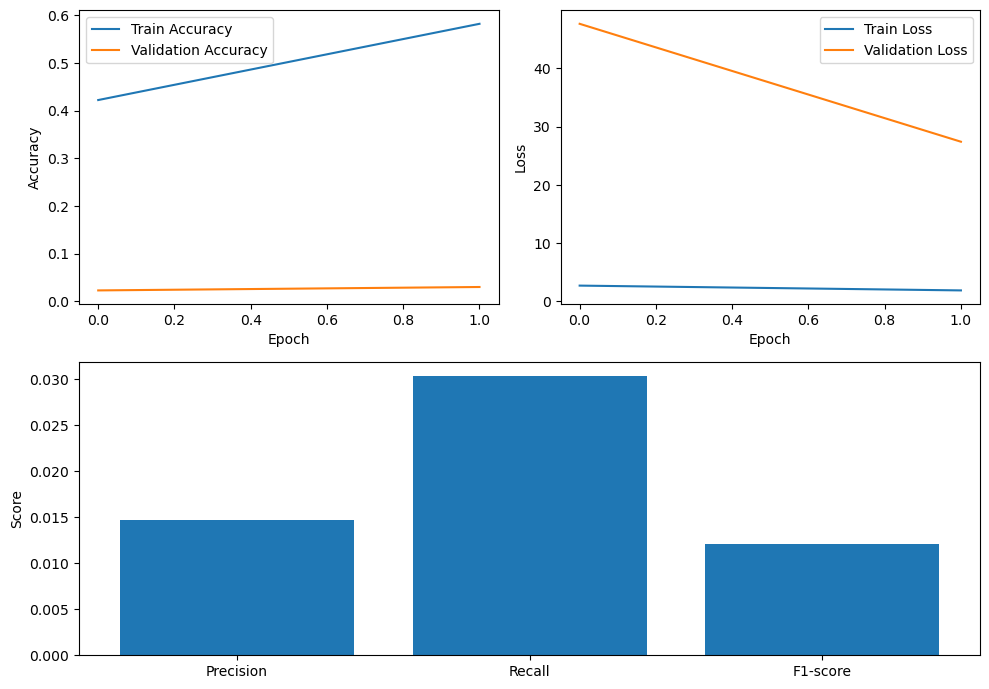

In [72]:

# Plot the training results and metrics
plot_training_results(history, x_test, y_test, model)

In [86]:
# Define functions for train, test, and deploy modes
from numpy import expand_dims
def train():
    model.fit(x_train, y_train,
              batch_size=64,
              epochs=1,
              validation_data=(x_test, y_test),
              shuffle=True)
    # Implement the training code here
    # ...

def test():
    scores = model.evaluate(x_test, y_test, verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1])
    # Implement the testing code here
    # ...

def deploy():
    # Load the saved model
    features_dict={}
    model_path = '/home/rs/21CS91R01/research/2023_ICVGIP-Code/baseline1/models/texture_model_deploy.h5'
    loaded_model = load_model(model_path) 
    loaded_model.summary()
    
    folder = '/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/datasets/FVC2006DB2A'
    for image_name in os.listdir(folder):
        if image_name.endswith(".bmp"):
            # Extract the label from the image name without considering variations
            image_name_ex = image_name.split(".")[0]           

            # Read the image
            image_path = os.path.join(folder, image_name)
            image = cv2.imread(image_path)

            # Resize the image
            resized_image = cv2.resize(image, (224, 224))

            # Convert the image to grayscale
            # gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

            # Normalize the image
            normalized_image = resized_image
            # expand dimensions so that it represents a single 'sample'
            img = expand_dims(normalized_image, axis=0)
            # prepare the image (e.g. scale pixel values for the vgg)
            # img = preprocess_input(img)
            # get feature map for first hidden layer
            [feature_maps, feature] = loaded_model.predict((img))
            features_dict[image_name_ex] = feature
            # print(feature_maps.shape) 
        serialized_dict = "\n".join([f"{key}: {value}" for key, value in features_dict.items()])
    import pickle

    with open("texture_features_dict_fvc2006_db2a.pkl", "wb") as file:
        pickle.dump(features_dict, file)  


In [87]:
def main():
    # Run the selected mode
    if args.mode == "train":
        train()
    elif args.mode == "test":
        test()
    elif args.mode == "deploy":
        deploy()
    else:
            pass


In [88]:
if __name__ =='__main__':
    # args
    main()

1/1 [==============================] - 2s 2s/step
(1, 140)
(1, 1024)
[[   0.        0.        0.     ... 2332.9536 1768.9503    0.    ]]


In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [4]:
import os
import cv2
import numpy as np
import pickle

concate_folder = '/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/features not concateones'
# Load the dictionary from the pickle file
with open("/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/features_dict_fvc2006_db2a.pkl", "rb") as file:
    features_dict = pickle.load(file)

folder = '/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/datasets/FVC2006DB2A'

import numpy as np
from keras.models import load_model

# Step 1: Load the saved model
saved_model_path = '/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/models/texture_model.h5'
loaded_model = load_model(saved_model_path)


for image_name in os.listdir(folder):
    # compare feature_dict keys with image name
    if image_name.endswith('.bmp'):
        # Extract the label from the image name without considering variations
        image_name_ex = image_name.split('.')[0]

        # Check if the image name exists as a key in features_dict
        if image_name_ex in features_dict:
            # # Read the image
            # image_path = os.path.join(folder, image_name)
            # image = cv2.imread(image_path)
        
            # # Resize the image
            # resized_image = cv2.resize(image, (224, 224))

            # Get the corresponding features from features_dict
            features = features_dict[image_name_ex]

            # Predict using your model on the resized image
            # [feature_maps, y] = model.predict(np.array([resized_image]))

            # Concatenate the features with y
            # concatenated_features = np.concatenate([features, y], axis=1)
            concatenated_features = features
            print("Concatenated Features:,Name,ShAPE", concatenated_features,image_name_ex,concatenated_features.shape)
                        # Save concatenated features to a text file
            reshaped_features = np.reshape(concatenated_features, (32, 32, 1))
            output_file_path = os.path.join(concate_folder, f"{image_name_ex}.txt")
            np.save(output_file_path, reshaped_features)

Concatenated Features:,Name,ShAPE [[0.508047 0.       0.       ... 0.       0.       0.      ]] 12_9 (1, 1024)
Concatenated Features:,Name,ShAPE [[0.71159434 0.         0.         ... 0.         0.         0.        ]] 94_12 (1, 1024)
Concatenated Features:,Name,ShAPE [[0.28191864 0.         0.         ... 0.         0.         0.        ]] 70_6 (1, 1024)
Concatenated Features:,Name,ShAPE [[0.46361703 0.         0.         ... 0.         0.         0.        ]] 35_6 (1, 1024)
Concatenated Features:,Name,ShAPE [[0.8891165 0.        0.        ... 0.        0.        0.       ]] 95_1 (1, 1024)
Concatenated Features:,Name,ShAPE [[0.7456489 0.        0.        ... 0.        0.        0.       ]] 128_3 (1, 1024)
Concatenated Features:,Name,ShAPE [[0.53696096 0.         0.         ... 0.         0.         0.        ]] 88_10 (1, 1024)
Concatenated Features:,Name,ShAPE [[0.92037624 0.         0.         ... 0.         0.28435355 0.        ]] 23_11 (1, 1024)
Concatenated Features:,Name,ShAPE [[

#with concatenated


In [93]:
import os
import cv2
import numpy as np
import pickle

concate_folder = '/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/baseline1/concat'
# Load the dictionary from the pickle file
with open("/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/features_dict.pkl", "rb") as file:
    features_dict = pickle.load(file)

folder = '/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/datasets/FVC2002DB2A'

for image_name in os.listdir(folder):
    # compare feature_dict keys with image name
    if image_name.endswith('.tif'):
        # Extract the label from the image name without considering variations
        image_name_ex = image_name.split('.')[0]

        # Check if the image name exists as a key in features_dict
        if image_name_ex in features_dict:
            # Read the image
            image_path = os.path.join(folder, image_name)
            image = cv2.imread(image_path)
        
            # Resize the image
            resized_image = cv2.resize(image, (224, 224))

            # Get the corresponding features from features_dict
            features = features_dict[image_name_ex]
            print("features",features.shape)
            # Predict using your model on the resized image
            [feature_maps, y] = model.predict(np.array([resized_image]))
            print(y.shape)
            # Concatenate the features with y
            concatenated_features = np.concatenate([features, y], axis=1)
            print("Concatenated Features:,Name,ShAPE", concatenated_features,image_name_ex,concatenated_features.shape)
                        # Save concatenated features to a text file
            reshaped_features = np.reshape(concatenated_features, (32, 32, 1))
            output_file_path = os.path.join(concate_folder, f"{image_name_ex}.txt")
            np.save(output_file_path, reshaped_features)

features (1, 512)
1/1 [==============================] - 0s 461ms/step
(1, 1024)
Concatenated Features:,Name,ShAPE [[1.5042006e+00 8.9965475e-01 1.3360727e-01 ... 2.4525955e+03
  1.5787324e+03 0.0000000e+00]] 87_3 (1, 1536)


ValueError: cannot reshape array of size 1536 into shape (32,32,1)

In [ ]:
import pickle
with open("/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/baseline1/features_dict.pkl", "rb") as file:
    features_dict = pickle.load(file)

In [60]:
loaded_concatenated_features = np.load('/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/baseline1/concat/1_1.txt.npy')
loaded_concatenated_features

array([[[ 6.9223732e-01],
        [ 1.2410707e-01],
        [ 6.4937544e-01],
        ...,
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 6.3157910e-01]],

       [[ 6.7731172e-02],
        [ 9.8376459e-01],
        [ 0.0000000e+00],
        ...,
        [ 0.0000000e+00],
        [ 1.7061598e+00],
        [ 1.1149155e-01]],

       [[ 3.7743852e-01],
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        ...,
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 1.2844551e+00]],

       ...,

       [[ 2.8595544e+02],
        [-3.4007400e+03],
        [ 2.8304141e+03],
        ...,
        [ 6.1458191e+02],
        [ 2.2444226e+02],
        [-4.8813081e+03]],

       [[ 1.4468853e+03],
        [-2.3620667e+03],
        [ 4.1082144e+03],
        ...,
        [-6.6500474e+03],
        [ 2.5831941e+03],
        [-2.5019561e+03]],

       [[-5.2927236e+03],
        [-2.2255435e+03],
        [ 4.3102114e+03],
        ...,
        [ 5.2767563e+03],
        [-6.192

In [23]:
print(concatenated_features)
reshaped_features = np.reshape(concatenated_features, (32, 32, 1))
print(reshaped_features)


[[ 0.0000000e+00  5.0060689e-01  0.0000000e+00 ...  4.5824536e+03
  -5.1262344e+03  2.8709363e+03]]
[[[ 0.0000000e+00]
  [ 5.0060689e-01]
  [ 0.0000000e+00]
  ...
  [ 1.6902678e+00]
  [ 8.8624203e-01]
  [ 1.6645782e-01]]

 [[ 0.0000000e+00]
  [ 0.0000000e+00]
  [ 1.7367622e-01]
  ...
  [ 0.0000000e+00]
  [ 0.0000000e+00]
  [ 0.0000000e+00]]

 [[ 0.0000000e+00]
  [ 8.3741939e-01]
  [ 6.5208837e-02]
  ...
  [ 0.0000000e+00]
  [ 6.9417167e-01]
  [ 1.2916510e+00]]

 ...

 [[ 8.0597052e+02]
  [-3.0533586e+03]
  [ 2.6234236e+03]
  ...
  [ 2.6094952e+02]
  [ 2.6577686e+02]
  [-4.1795122e+03]]

 [[ 1.1937926e+03]
  [-2.2541482e+03]
  [ 4.3962710e+03]
  ...
  [-5.4779619e+03]
  [ 2.3272324e+03]
  [-2.2961184e+03]]

 [[-4.3097466e+03]
  [-1.6759949e+03]
  [ 4.2352471e+03]
  ...
  [ 4.5824536e+03]
  [-5.1262344e+03]
  [ 2.8709363e+03]]]


In [36]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input
from tensorflow.keras import layers

In [61]:
# visualize feature maps output from each block in the vgg model
# from keras.applications.vgg16 import VGG16

# from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
# model = VGG16()
# redefine model to output right after the first hidden layer
# ixs = [2, 5, 9, 15, 17]
# outputs = [model.layers[i].output for i in ixs]
# model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
 # Read the image

image = cv2.imread('/home/rs/21CS91R01/research/2023_ICVGIP-Code-1/datasets/FVC2002DB2A/1_1.tif')

        # Resize the image
resized_image = cv2.resize(image, (224, 224))

        # Convert the image to grayscale
        # gray_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

        # Normalize the image
normalized_image = resized_image
# expand dimensions so that it represents a single 'sample'
img = expand_dims(normalized_image, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
# img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(np.array(img))
print(feature_maps)
# plot the output from each block
# square = 8
# for fmap in feature_maps:
# 	# plot all 64 maps in an 8x8 squares
# 	ix = 1
# 	for _ in range(square):
# 		for _ in range(square):
# 			# specify subplot and turn of axis
# 			ax = pyplot.subplot(square, square, ix)
# 			ax.set_xticks([])
# 			ax.set_yticks([])
# 			# plot filter channel in grayscale
# 			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
# 			ix += 1
# 	# show the figure
# 	pyplot.show()

1/1 [==============================] - 0s 104ms/step
[[2.04106968e-23 1.16769307e-21 9.54870003e-11 3.24650362e-10
  2.97902910e-17 2.20609531e-10 2.21261800e-07 1.68365349e-14
  1.32549451e-27 1.94078099e-21 1.10384624e-15 9.59667153e-17
  5.14439538e-17 1.48731793e-04 2.69142089e-17 1.95768076e-15
  1.00475606e-09 2.48437654e-02 1.97487819e-13 6.66422777e-32
  1.73852442e-13 2.31362276e-21 1.86992247e-14 1.37033829e-19
  6.08314961e-12 1.96283206e-01 2.27803895e-07 5.18393778e-15
  1.08344919e-13 5.51523190e-19 9.55567522e-19 3.69216235e-17
  1.03755676e-12 1.26792147e-04 8.23869965e-12 1.18797366e-22
  3.80508482e-07 1.77657436e-13 4.95310348e-10 5.64794895e-08
  1.96096852e-01 6.60649237e-17 1.25030749e-06 1.83334858e-11
  9.28417326e-12 1.70434038e-19 1.63331542e-15 2.47063480e-17
  7.17971000e-17 3.93871040e-15 6.11169752e-13 1.88894965e-22
  6.29674896e-17 3.03268717e-12 1.74180407e-20 7.31001874e-16
  1.62196628e-14 6.57727902e-15 1.09976844e-24 1.31528688e-09
  5.12812559e-20 